In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

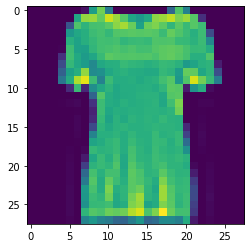

In [ ]:
plt.imshow(x_train[10])
plt.show()

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   9,   6,
          0,   0,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 209, 231, 248,
        252, 250, 253, 246, 206, 132,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 227, 243, 234, 234,
        248, 246, 238, 230, 234, 250, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  57, 231, 213, 227, 234,
        232, 231, 235, 232, 218, 218, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 239, 207, 213, 236,
        235, 232, 232, 229, 210, 215, 207,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 211, 245, 229, 197, 220,
        221, 221, 222, 203, 221, 235, 222,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[5]

2

In [ ]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train=x_train/255
x_test=x_test/255


In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 1.1066 - accuracy: 0.6357
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.8451
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8578
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8661
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3456 - accuracy: 0.8756
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.8807
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3221 - accuracy: 0.8826
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.8884
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8905
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2935 - accuracy: 0.8938

In [ ]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8705


In [ ]:
predicted_values=model.predict(x_test[:10])
print(predicted_values)

[[2.82915676e-06 9.01368912e-06 6.15079261e-05 5.88920500e-07
  2.56260428e-05 2.09025070e-02 4.53690882e-06 9.05782357e-02
  1.30939845e-03 8.87105703e-01]
 [2.66622123e-06 5.14518320e-07 9.62050259e-01 5.51776748e-06
  2.29247231e-02 1.60097261e-12 1.50155583e-02 2.36727901e-13
  6.75154524e-07 8.74141390e-15]
 [3.34329502e-06 9.99996305e-01 1.13893215e-07 2.26391194e-07
  1.23236452e-08 1.14623588e-13 4.69538115e-08 1.13745234e-17
  3.16861168e-08 1.97656317e-13]
 [5.79783955e-06 9.99971509e-01 1.70729970e-06 2.00310569e-05
  3.31676944e-07 6.80024162e-11 6.63862977e-07 1.52963698e-14
  1.86416305e-08 1.46095965e-11]
 [1.02305971e-01 1.26021334e-07 2.54116505e-02 2.57658097e-03
  4.94273240e-03 1.89902361e-09 8.59963596e-01 1.51917249e-07
  4.79913177e-03 2.26713581e-09]
 [1.44856444e-04 9.99830365e-01 6.88520959e-06 5.15474358e-06
  6.67604411e-07 7.94016519e-11 1.15821231e-05 7.10808789e-15
  4.93587720e-07 2.63740522e-11]
 [6.89455192e-04 9.42315557e-04 7.47322431e-03 5.18224610e

In [ ]:
print(np.argmax(predicted_values,axis=1))

[9 2 1 1 6 1 4 6 5 7]


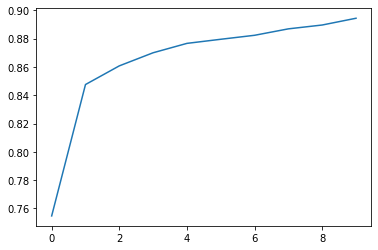

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

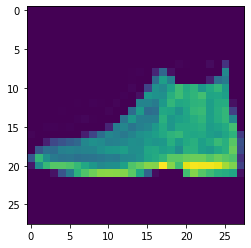

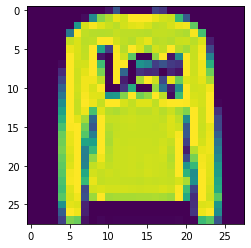

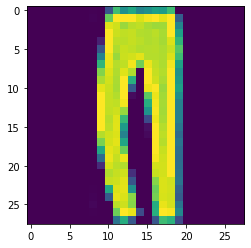

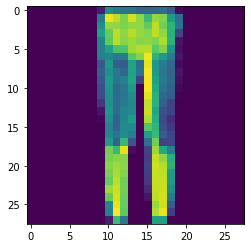

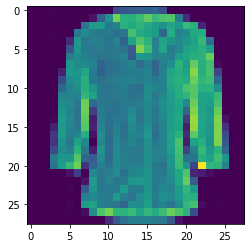

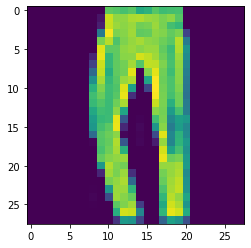

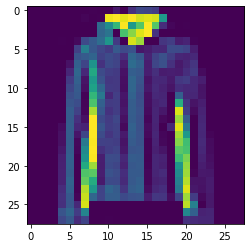

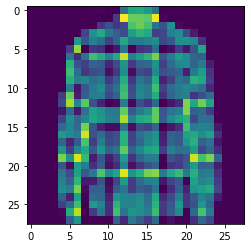

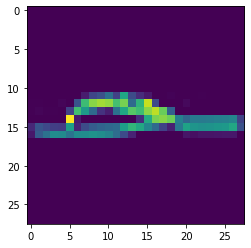

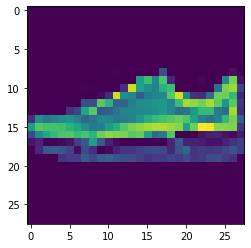

In [ ]:
for i in range(0,10):
  image=x_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()